# Perceptron Classifier using Scikit-Learn

In [48]:
%matplotlib inline
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target
print('Labels for [Iris-Setosa; Iris-Versicolor; Iris-Virginica]: {0}'.format(np.unique(y)))

Labels for [Iris-Setosa; Iris-Versicolor; Iris-Virginica]: [0 1 2]


## Create a training and test data set for Cross Validation

In [49]:
print ('Size of x before split:{0}'.format(np.shape(x)))
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
            x, y, test_size = 0.3, random_state=0)
print ('Size of x after split:{0}'.format(np.shape(x_train)))

Size of x before split:(150L, 2L)
Size of x after split:(105L, 2L)


## Feature scaling

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Estimate the parameters $\mu$ and $\sigma$ using `fit` method. Standardise each dataset using the `transform` method.

In [51]:
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

## Train the Perceptron Model

Use multiclass classification support prebuilt into scikit-learn's perceptron algorithm via the **One-vs-Rest (OVR)** method.

In [52]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(x_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

## Make predictions (classification)

Use the `predict` method.

In [53]:
y_pred = ppn.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


## Plot Results

In [54]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')

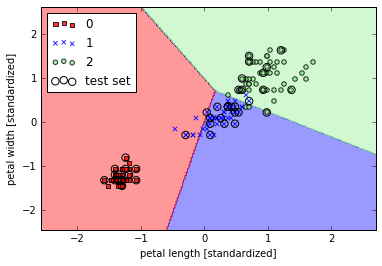

In [57]:
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=x_combined_std,y=y_combined,classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

From the plot above it can be seen that the three flower classes cannot be perfectly separated by linear decision boundaries.